<a href="https://colab.research.google.com/github/Thiashopy04/PROSES-MINING/blob/main/BAGIAN_D_%E2%80%94_Process_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pm4py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 12.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter

from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristic_miner

from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer

In [3]:
df = pd.read_csv('/content/1767518350948_event_log_rumah_sakit_sintetis.csv')
df.head()

,case_id,activity,timestamp,resource,lifecycle,department,insurance_type,severity,cost_idr,variant
0,RS-00001,Pendaftaran,2025-12-11 19:17:08,Admin-01,complete,IGD,BPJS,Ringan,12290,rawat_jalan_sederhana
1,RS-00001,Triage,2025-12-11 19:53:08,Perawat-01,complete,IGD,BPJS,Ringan,0,rawat_jalan_sederhana
2,RS-00001,Pemeriksaan Dokter,2025-12-11 20:14:08,Dokter-Umum-01,complete,IGD,BPJS,Ringan,38944,rawat_jalan_sederhana
3,RS-00001,Resep Obat,2025-12-11 20:32:08,Dokter-Umum-02,complete,IGD,BPJS,Ringan,0,rawat_jalan_sederhana
4,RS-00001,Pembayaran,2025-12-11 21:15:08,Kasir-03,complete,IGD,BPJS,Ringan,0,rawat_jalan_sederhana


In [4]:
# konversi timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

# urutkan event
df = df.sort_values(['case_id', 'timestamp'])

In [5]:
df_pm = df.rename(columns={
    'case_id': 'case:concept:name',
    'activity': 'concept:name',
    'timestamp': 'time:timestamp',
    'resource': 'org:resource'
})

df_pm = dataframe_utils.convert_timestamp_columns_in_df(df_pm)

In [6]:
event_log = log_converter.apply(df_pm)
type(event_log)

pm4py.objects.log.obj.EventLog

In [7]:
process_tree = inductive_miner.apply(event_log)

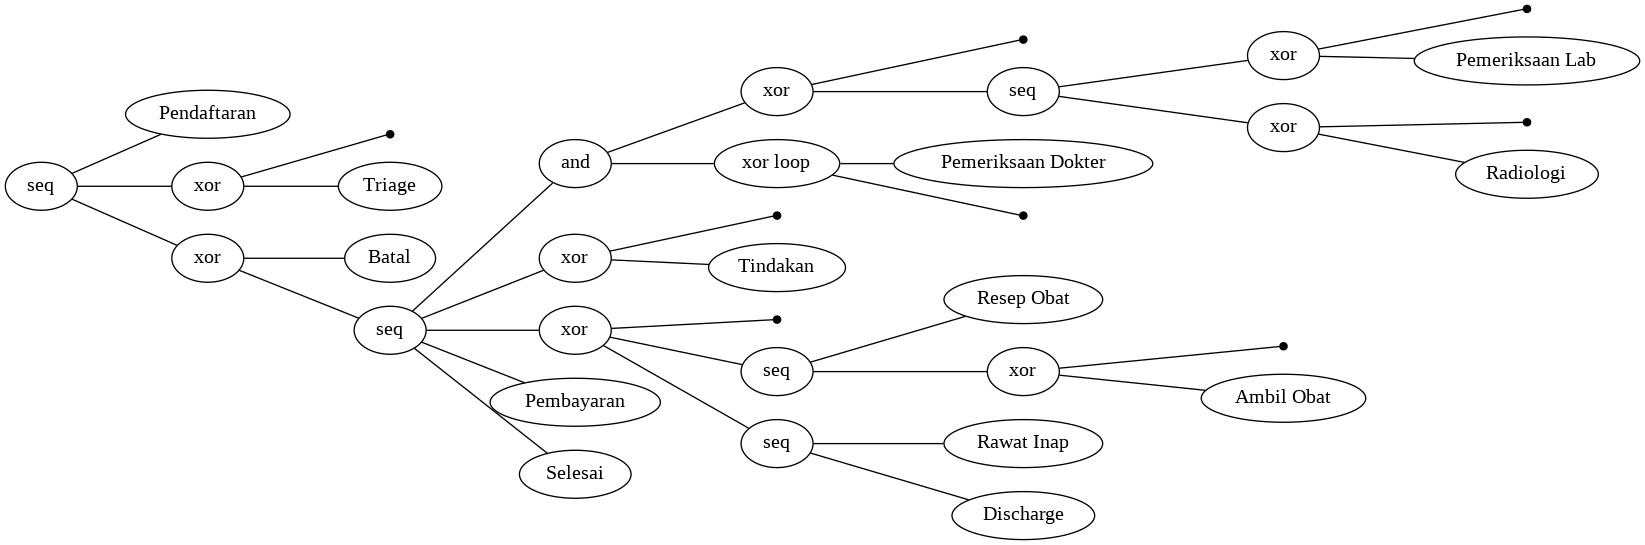

In [8]:
gviz_tree = pt_visualizer.apply(process_tree)
pt_visualizer.view(gviz_tree)

In [9]:
from pm4py.objects.conversion.process_tree import converter as pt_converter

net_im, im, fm = pt_converter.apply(process_tree)

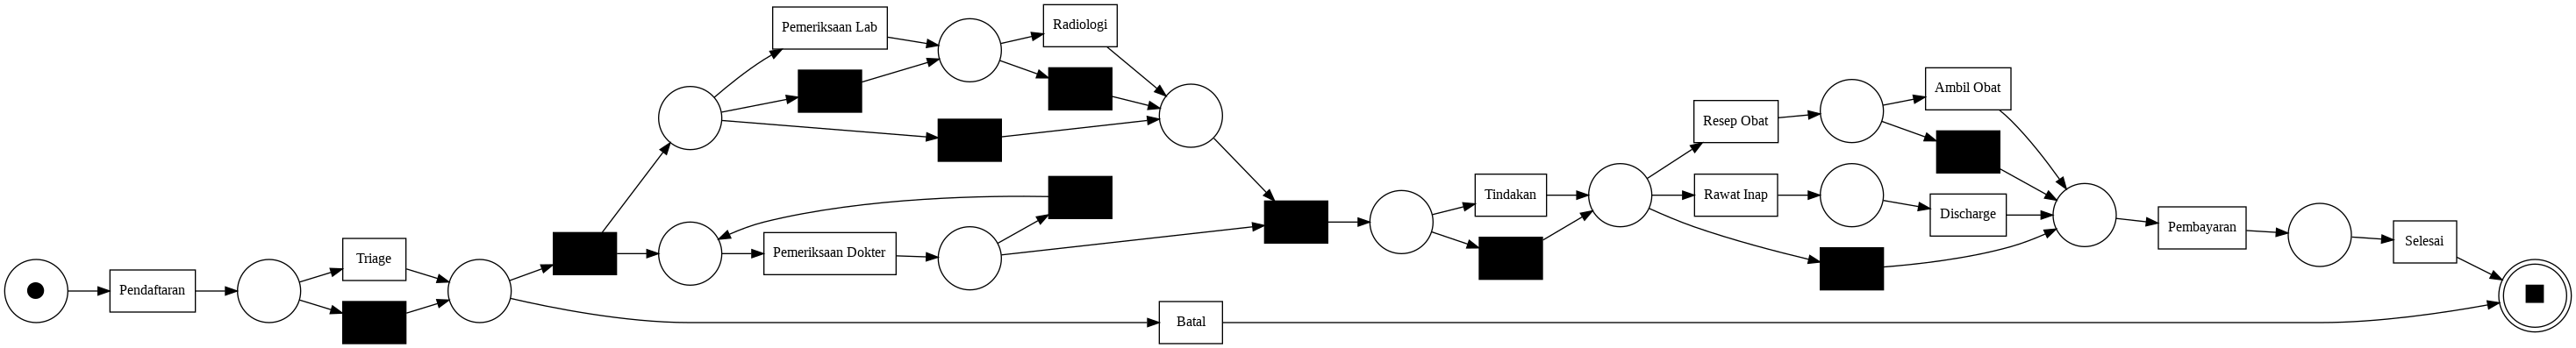

In [10]:
gviz_im = pn_visualizer.apply(net_im, im, fm)
pn_visualizer.view(gviz_im)

In [11]:
net_hm, im_hm, fm_hm = heuristic_miner.apply(event_log)

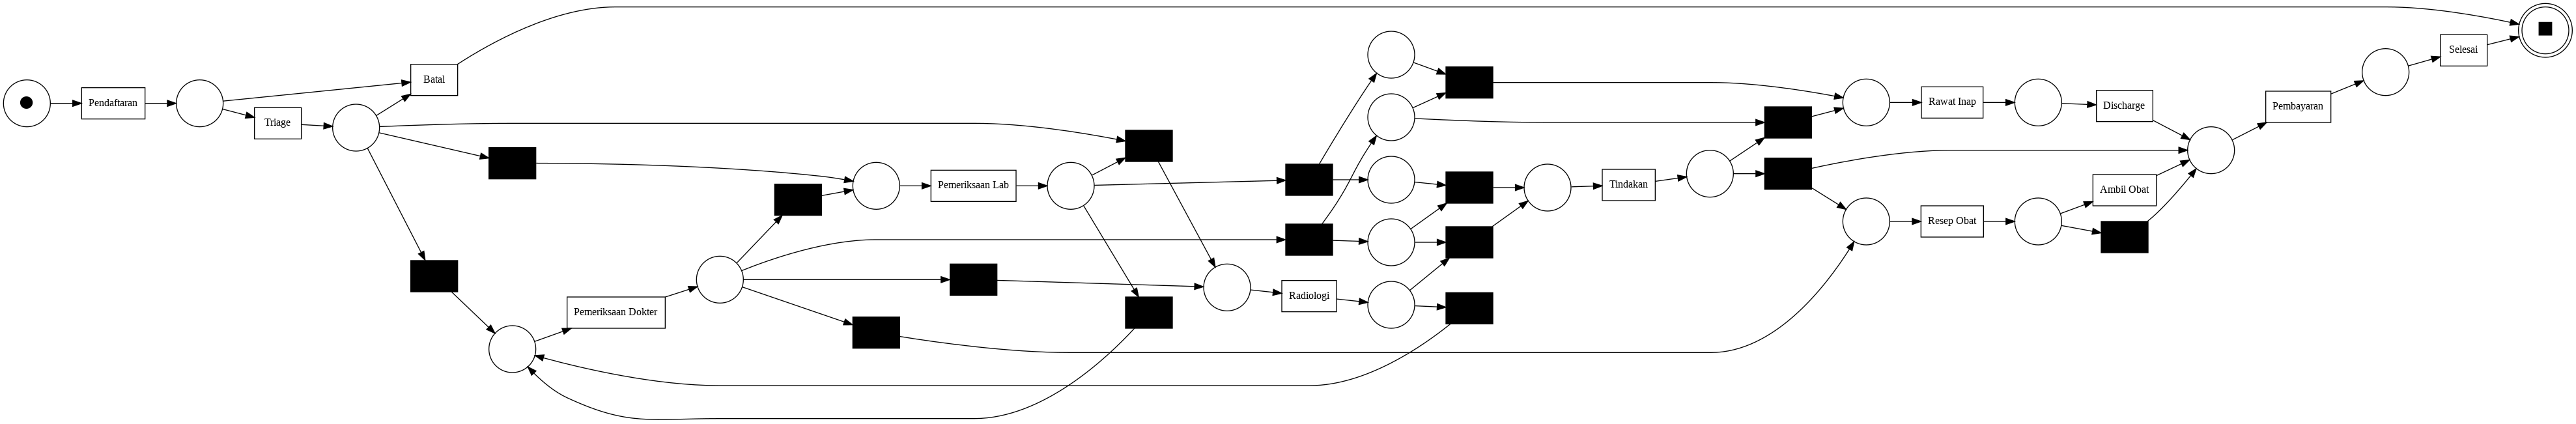

In [12]:
gviz_hm = pn_visualizer.apply(net_hm, im_hm, fm_hm)
pn_visualizer.view(gviz_hm)

🧩 CELL 6 — Perbandingan Model (Analisis)
✍️ Narasi Laporan

Inductive Miner

*   Model lebih terstruktur dan bersih
*   Mudah Dibaca
*   Menjamin soundness (tidak deadlock)
*   Cocok untuk laporan akademik

Heuristic Miner
*   Model lebih detail & kompleks
*   Menangkap frekuensi dan variasi proses
*   Lebih sulit dibaca
*   Cocok untuk analisis operasional

📌 laporan:

Model yang dihasilkan oleh Inductive Miner menunjukkan struktur proses yang lebih sederhana dan mudah dibaca, sehingga cocok untuk pemahaman alur utama layanan rumah sakit.
Sementara itu, Heuristic Miner menghasilkan model yang lebih kompleks karena menangkap lebih banyak variasi perilaku dalam event log.
Dari sisi readability, Inductive Miner lebih unggul, sedangkan dari sisi kesesuaian terhadap log, Heuristic Miner mampu merepresentasikan detail proses yang lebih kaya.